# Statistical Methods For Forecasting Quantitative Time Series

In [3]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

In [4]:
df_tesla = pdr.get_data_yahoo('TSLA')

In [6]:
df_tesla

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-02-27,49.672001,48.402000,49.633999,49.245998,57304000.0,49.245998
2017-02-28,50.200001,48.779999,48.838001,49.998001,30390500.0,49.998001
2017-03-01,50.970001,49.821999,50.835999,50.004002,24047500.0,50.004002
2017-03-02,50.655998,49.653999,49.942001,50.096001,16759000.0,50.096001
2017-03-03,50.380001,49.799999,50.147999,50.313999,14597000.0,50.313999
...,...,...,...,...,...,...
2022-02-18,886.869995,837.609985,886.000000,856.979980,22710500.0,856.979980
2022-02-22,856.729980,801.099976,834.130005,821.530029,27762700.0,821.530029
2022-02-23,835.299988,760.559998,830.429993,764.039978,31752300.0,764.039978


## Simple Moving Average

<AxesSubplot:xlabel='Date'>

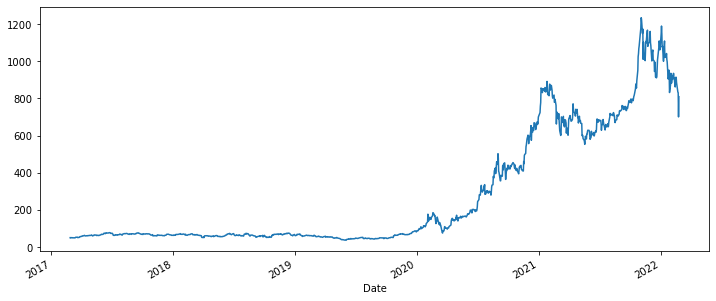

In [8]:
df_tesla['Open'].plot(figsize=(12,5))

In [10]:
#applying simple moving average
df_tesla['Open:10 days rolling'] = df_tesla['Open'].rolling(window=10,min_periods=1).mean()

In [12]:
df_tesla.head(20)

,High,Low,Open,Close,Volume,Adj Close,Open:10 days rolling
Date,,,,,,,
2017-02-27,49.672001,48.402000,49.633999,49.245998,57304000.0,49.245998,49.633999
2017-02-28,50.200001,48.779999,48.838001,49.998001,30390500.0,49.998001,49.236000
2017-03-01,50.970001,49.821999,50.835999,50.004002,24047500.0,50.004002,49.769333
2017-03-02,50.655998,49.653999,49.942001,50.096001,16759000.0,50.096001,49.812500
2017-03-03,50.380001,49.799999,50.147999,50.313999,14597000.0,50.313999,49.879600
2017-03-06,50.340000,49.501999,49.582001,50.242001,16777500.0,50.242001,49.830000
2017-03-07,50.778000,49.664001,50.383999,49.717999,17297500.0,49.717999,49.909143
2017-03-08,50.014000,49.063999,49.400002,49.374001,18626000.0,49.374001,49.845500
2017-03-09,49.731998,48.599998,49.526001,48.980000,19396500.0,48.980000,49.810000


<AxesSubplot:xlabel='Date'>

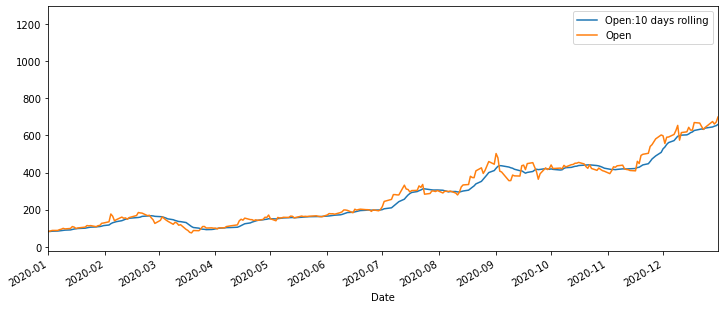

In [18]:
df_tesla[['Open:10 days rolling','Open']].plot(xlim=['2020-01-01','2020-12-31'],figsize=(12,5))

## Cummulative Moving Average (CMA)

<AxesSubplot:xlabel='Date'>

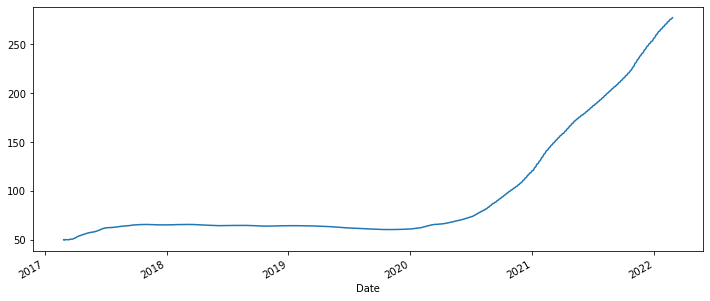

In [19]:
#  plotting cma using expanding

df_tesla['Open'].expanding().mean().plot(figsize=(12,5))

## Exponential moving average (EMA)

In [21]:
# alpha - smoothening factor and acts like hyperparameter

df_tesla['EMA']=df_tesla['Open'].ewm(alpha=0.1,adjust=False).mean()

,High,Low,Open,Close,Volume,Adj Close,Open:10 days rolling,EMA
Date,,,,,,,,
2017-02-27,49.672001,48.402000,49.633999,49.245998,57304000.0,49.245998,49.633999,49.633999
2017-02-28,50.200001,48.779999,48.838001,49.998001,30390500.0,49.998001,49.236000,49.554399
2017-03-01,50.970001,49.821999,50.835999,50.004002,24047500.0,50.004002,49.769333,49.682559
2017-03-02,50.655998,49.653999,49.942001,50.096001,16759000.0,50.096001,49.812500,49.708503
2017-03-03,50.380001,49.799999,50.147999,50.313999,14597000.0,50.313999,49.879600,49.752453


<AxesSubplot:xlabel='Date'>

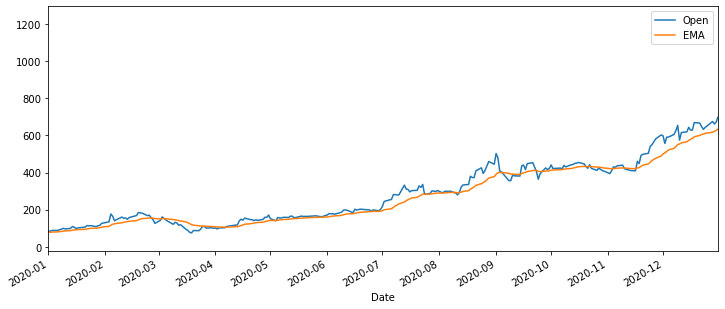

In [23]:
df_tesla[['Open','EMA']].plot(xlim=['2020-01-01','2020-12-31'],figsize=(12,5))

## Exponential Weighted Moving Average (EWMA)

In [24]:
# span - smoothening factor and acts like hyperparameter

df_tesla['EWMA']=df_tesla['Open'].ewm(span=5,adjust=False).mean()

<AxesSubplot:xlabel='Date'>

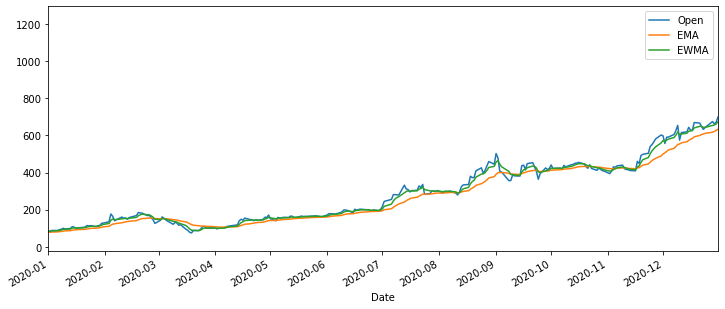

In [26]:
#comparing EWMA with EMA, where EWMA provides more smoothening

df_tesla[['Open','EMA','EWMA']].plot(xlim=['2020-01-01','2020-12-31'],figsize=(12,5))